<a href="https://colab.research.google.com/github/PaulaDiz/QUANTUM_COMPUTING/blob/main/UFVQC2025_01_IntroAndBellStates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## For google Collab users, remove if you are running on your local machine
!pip install qiskit qiskit-ibm-runtime qiskit[visualization]

import qiskit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━

###### QC UFV 2025
#  01 - Introduction and Bell States


Please, get used to checking the documentation of libraries you program with, in this case, Qiskit:

<div class="alert alert-block alert-info">
<a href="https://docs.quantum.ibm.com/guides">Qiskit Documentation</a>
</div>

---

### Quantum Circuits

In this course, we will use Qiskit in order to define quantum circuits, and to run them on simulators and real hardware.

As we saw previously, there are three sections in any circuit:
1. Initialization
2. Operations
3. Measurements

In Qiskit, we use the python class `QuantumCircuit` in order to encapsulate all of these sections.

Here, we will see how to initialize a `QuantumCircuit` with 1 Qubit and 1 Classical Bit.
We can use `QuantumRegister` to represent Qubits, and `ClassicalRegister` to represent Bits.

In [4]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

qubit = QuantumRegister(1, 'our_qubit') #qubits cuanticos
bit = ClassicalRegister(1, 'our_bit') #bits clasicos
qc = QuantumCircuit(qubit, bit) # con (1,1) tambien funciona primero qubits segundo bits clasicos

Now, a circuit without operations serves no purpose, let's imagine we want to make a 1bit random number generator.

Our objective, is to have a circuit, that each time its run, returns either 1 or 0, in a 50/50 distribution.

For that, our circuit will have 3 phases:
1. Initialization of our Qubit to |0> (This is the default in Qiskit, so we dont have to do anything)
2. Modify the state so that we have this 50/50 probability of measuring 1 or 0.
3. Measure our qubit, and save the result into our bit.

In this case, for the operation we can just use a Hadamard gate to make our qubit a perfect 50/50 superposition.

In [5]:
# We apply the Hadamard gate to the qubit
qc.h(qubit) #qubit[0]seria si tuvieramos dos y lo aplicariamos al segundo

# We could also apply the Hadamard gate to the qubit using the following syntax
# qc.h(0) < Index of the qubit

In [6]:
# Finally, we measure the qubit into our bit
qc.measure(qubit, bit) #qubit[0]seria si tuvieramos dos y lo aplicariamos al segundo
# esto significa q quiero medir ese qubit y guardarlo en ese bit
# Again, we could also measure the qubit into our bit using the following syntax
# qc.measure(0, 0) < Index of the qubit and bit

In [7]:
# We can now visualize our circuit with:

qc.draw() # If we dont have the visualization package

┌───┐┌─┐
our_qubit: ┤ H ├┤M├
           └───┘└╥┘
our_bit: 1/══════╩═
                 0

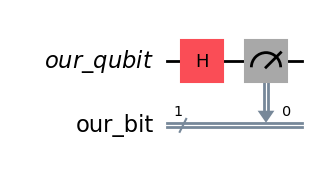

In [8]:
qc.draw(output='mpl') # If we do

Great! We have our random bit generator.

Now, this is of no use if we dont actually run it, so we will do this next!

In Qiskit the service that runs circuits is called Qiskit Runtime, and it allows for two kinds of results:

- Sampler te da una distribucion
- Estimator este te da el expectation value (la media)

They are essentially the same thing, they run our circuit and return a value, the only change is in how they return it:

- The Sampler returns a distribution of the results given by our circuit.
- The Estimator, returns the _Expectation value_ of our circuit instead. (We will see this in another class)

Let's use the sampler for now.

In [9]:
# The part we dont care about now
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2  #procesador cuantico
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)

In [10]:
# The part we care about now
isa_qc = pm.run(qc)

sampler = Sampler(mode=fake_manila)

job = sampler.run([isa_qc], shots=1) #shots: cantidad de veces q lanzamos el circuito

job

/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [11]:
# Lets see if the job has finished
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [12]:
# Lets get the results
pub_result = job.result()[0]
print(pub_result)

SamplerPubResult(data=DataBin(our_bit=BitArray(<shape=(), num_shots=1, num_bits=1>)), metadata={'shots': 1, 'circuit_metadata': {}})


In [13]:
pub_result.data.our_bit.get_counts() # el uno es que ha salido una vez

{'0': 1}

In [14]:
qc.draw()

┌───┐┌─┐
our_qubit: ┤ H ├┤M├
           └───┘└╥┘
our_bit: 1/══════╩═
                 0

In [15]:
# Now, can you run this circuit 10, 100, 1000 times and see if the results are what you expect?

# << Your code here >>
# The part we dont care about now
# Solo hace falta volver a copiar el compilador
sampler = Sampler(mode=fake_manila)

job = sampler.run([isa_qc], shots=100) #shots: cantidad de veces q lanzamos el circuito

job
# Lets see if the job has finished
job.status()
# Lets get the results
pub_result = job.result()[0]
print(pub_result)
pub_result.data.our_bit.get_counts() # el uno es la probabilidad

SamplerPubResult(data=DataBin(our_bit=BitArray(<shape=(), num_shots=100, num_bits=1>)), metadata={'shots': 100, 'circuit_metadata': {}})


/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


{'1': 42, '0': 58}

---

### Bell States

Your task, program the simplest Bell State Circuit

El circuito para el estado de Bell $|\Psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ es:

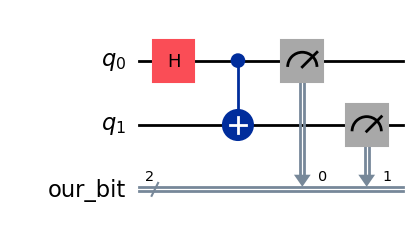

In [32]:
#CREACIÓN DEL CIRCUITO

#Número de qubits
qubit = QuantumRegister(2, 'q') #qubits cuanticos

#Número de bits (Cada qubit lleva un bit asociado)
bit = ClassicalRegister(2, 'our_bit') #bits clasicos

#Creamos el circuito con nuestros qubits y bits
qc = QuantumCircuit(qubit, bit) # con (1,1) tambien funciona primero qubits segundo bits clasicos
#-------------------------------------------------------------------------------------------------

#APLICACIÓN DE PUERTAS

qc.h(qubit[0]) #qubit[0]seria si tuvieramos dos y lo aplicariamos al segundo
qc.cx(0,1) # q0 es el cubit de control y q1 el que actua

#--------------------------------------------------------------------------------------------------

#MEDICIONES
qc.measure(0,0)
qc.measure(1,1)
#tambien puede hacerse como -> qc.measure([0,0],[1,1]) el primer corchete son los cubits y el segundo
#los bits asociados a cada uno.

#----------------------------------------------------------------------------------------------------
#DIBUJUAMOS EL CIRCUITO
qc.draw(output='mpl')

el circuito para el estado de Bell $|\Psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$ es:

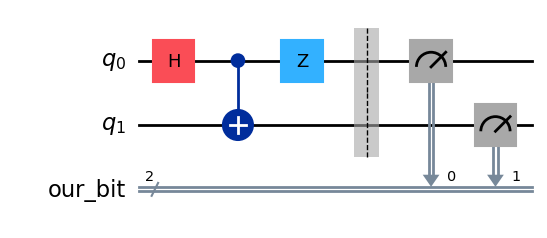

In [24]:
#CREACIÓN DEL CIRCUITO

#Número de qubits
qubit = QuantumRegister(2, 'q') #qubits cuanticos

#Número de bits (Cada qubit lleva un bit asociado)
bit = ClassicalRegister(2, 'our_bit') #bits clasicos

#Creamos el circuito con nuestros qubits y bits
qc = QuantumCircuit(qubit, bit) # con (1,1) tambien funciona primero qubits segundo bits clasicos
#-------------------------------------------------------------------------------------------------

#APLICACIÓN DE PUERTAS

qc.h(qubit[0]) # Aplicamos hadamard al primer cubit
qc.cx(0,1) # q0 es el cubit de control y q1 el que actua
qc.barrier()
qc.z(qubit[0]) #Puerta z para cambiar el signo
qc.barrier()

#--------------------------------------------------------------------------------------------------

#MEDICIONES
qc.measure([0,1],[0,1])

#----------------------------------------------------------------------------------------------------
#DIBUJUAMOS EL CIRCUITO
qc.draw(output='mpl')
qc.draw(output='mpl')

el circuito para el estado de Bell $|\Psi\rangle = \frac{1}{\sqrt{2}}(|10\rangle + |01\rangle)$ es:



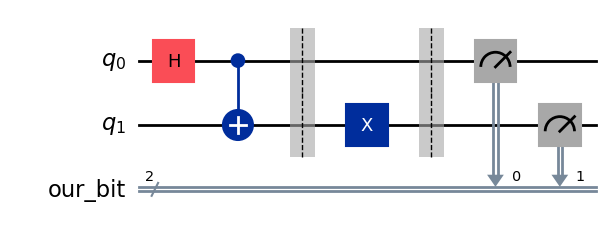

In [33]:
#CREACIÓN DEL CIRCUITO

#Número de qubits
qubit = QuantumRegister(2, 'q') #qubits cuanticos

#Número de bits (Cada qubit lleva un bit asociado)
bit = ClassicalRegister(2, 'our_bit') #bits clasicos

#Creamos el circuito con nuestros qubits y bits
qc = QuantumCircuit(qubit, bit) # con (1,1) tambien funciona primero qubits segundo bits clasicos
#-------------------------------------------------------------------------------------------------

#APLICACIÓN DE PUERTAS

qc.h(qubit[0]) #qubit[0]seria si tuvieramos dos y lo aplicariamos al segundo
qc.cx(0,1) # q0 es el cubit de control y q1 el que actua
qc.barrier()
qc.x(qubit[1])
qc.barrier()

#--------------------------------------------------------------------------------------------------

#MEDICIONES
qc.measure([0,1],[0,1])

#----------------------------------------------------------------------------------------------------
#DIBUJUAMOS EL CIRCUITO
qc.draw(output='mpl')

el circuito para el estado de Bell $|\Psi\rangle = \frac{1}{\sqrt{2}}(|10\rangle - |01\rangle)$ es:


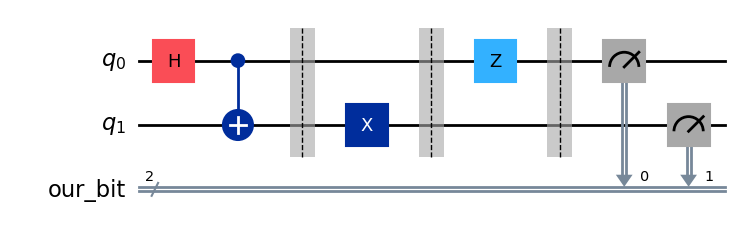

In [34]:
#CREACIÓN DEL CIRCUITO

#Número de qubits
qubit = QuantumRegister(2, 'q') #qubits cuanticos

#Número de bits (Cada qubit lleva un bit asociado)
bit = ClassicalRegister(2, 'our_bit') #bits clasicos

#Creamos el circuito con nuestros qubits y bits
qc = QuantumCircuit(qubit, bit) # con (1,1) tambien funciona primero qubits segundo bits clasicos
#-------------------------------------------------------------------------------------------------

#APLICACIÓN DE PUERTAS

qc.h(qubit[0]) #qubit[0]seria si tuvieramos dos y lo aplicariamos al segundo
qc.cx(0,1) # q0 es el cubit de control y q1 el que actua
qc.barrier()
qc.x(qubit[1])
qc.barrier()
qc.z(qubit[0])
qc.barrier()

#--------------------------------------------------------------------------------------------------

#MEDICIONES
qc.measure([0,1],[0,1])

#----------------------------------------------------------------------------------------------------
#DIBUJUAMOS EL CIRCUITO
qc.draw(output='mpl')